In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [99]:
df1 = pd.read_json("data.json")
df2 = pd.read_json("data2.json")

In [100]:
df = pd.concat([df1, df2], ignore_index=True)
df= df.sample(frac=1).reset_index(drop=True)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[United States],$135.00,$70k+,\n 70\n hourly jobs\n ...,\n 22\n fixed-price jobs...,\n 821\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Web analytics is probably a chore for ...,Data Science & Analytics
1,[United States],$375.00,$200k+,\n 70\n hourly jobs\n ...,\n 13\n fixed-price jobs...,\n 3522\n hours worked\n...,\n 100% \n Job Success\n ...,\n If you are a business owner who strugg...,Accounting & Consulting
2,[India],$12.00,$10k+,\n 16\n hourly jobs\n ...,\n 5\n fixed-price jobs\...,\n 3968\n hours worked\n...,\n 100% \n Job Success\n ...,\n Rated TOP-Customer Support-Service- Cu...,Customer Service
3,[Colombia],$18.00,$10k+,\n 17\n hourly jobs\n ...,\n 31\n fixed-price jobs...,\n 737\n hours worked\n ...,\n 88% \n Job Success\n,\n I have been creating professional Logo...,Design & Creative
4,[Bangladesh],$10.00,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Open For interview.\n\nWalmart Approva...,Admin Support
...,...,...,...,...,...,...,...,...,...
1195,[United States],$125.00,$10k+,\n 12\n hourly jobs\n ...,\n 1\n fixed-price job\n...,\n 309\n hours worked\n ...,,\n 9 years of cannabis industry experienc...,Accounting & Consulting
1196,[Egypt],$7.00,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Iam furniture desginer able to use aut...,Accounting & Consulting
1197,[Pakistan],$5.50,,,,,\n 100% \n Job Success\n ...,\n I have experience in the field of eCom...,Admin Support
1198,[Egypt],$30.00,,,,,\n 100% \n Job Success\n ...,"\n Skills: architectural design, BIM, Rev...",Engineering & Architecture


In [101]:
df.head()

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,[United States],$135.00,$70k+,\n 70\n hourly jobs\n ...,\n 22\n fixed-price jobs...,\n 821\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Web analytics is probably a chore for ...,Data Science & Analytics
1,[United States],$375.00,$200k+,\n 70\n hourly jobs\n ...,\n 13\n fixed-price jobs...,\n 3522\n hours worked\n...,\n 100% \n Job Success\n ...,\n If you are a business owner who strugg...,Accounting & Consulting
2,[India],$12.00,$10k+,\n 16\n hourly jobs\n ...,\n 5\n fixed-price jobs\...,\n 3968\n hours worked\n...,\n 100% \n Job Success\n ...,\n Rated TOP-Customer Support-Service- Cu...,Customer Service
3,[Colombia],$18.00,$10k+,\n 17\n hourly jobs\n ...,\n 31\n fixed-price jobs...,\n 737\n hours worked\n ...,\n 88% \n Job Success\n,\n I have been creating professional Logo...,Design & Creative
4,[Bangladesh],$10.00,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Open For interview.\n\nWalmart Approva...,Admin Support


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           1200 non-null   object
 1   hourly_price      1200 non-null   object
 2   total_earning     1200 non-null   object
 3   hourly_jobs       1200 non-null   object
 4   fixed_price_jobs  1200 non-null   object
 5   hours_worked      1200 non-null   object
 6   job_success       1200 non-null   object
 7   description       1200 non-null   object
 8   category          1200 non-null   object
dtypes: object(9)
memory usage: 84.5+ KB


## **Cleaning Data**
 - Tasks to do :
    - Fix Data types problems (e.g deleting `$` from `hourly_price` & `total_earning` columns and then converting it to numerical values, percentage in `job_success` column ...)
    - Take care of missing values  ( missing values were not showing previously in the df.info() output because python interpret an empty string as non-null )

##### fix     `country_column`  :

In [103]:
df["country"]= df["country"].str[0]
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,$135.00,$70k+,\n 70\n hourly jobs\n ...,\n 22\n fixed-price jobs...,\n 821\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Web analytics is probably a chore for ...,Data Science & Analytics
1,United States,$375.00,$200k+,\n 70\n hourly jobs\n ...,\n 13\n fixed-price jobs...,\n 3522\n hours worked\n...,\n 100% \n Job Success\n ...,\n If you are a business owner who strugg...,Accounting & Consulting
2,India,$12.00,$10k+,\n 16\n hourly jobs\n ...,\n 5\n fixed-price jobs\...,\n 3968\n hours worked\n...,\n 100% \n Job Success\n ...,\n Rated TOP-Customer Support-Service- Cu...,Customer Service
3,Colombia,$18.00,$10k+,\n 17\n hourly jobs\n ...,\n 31\n fixed-price jobs...,\n 737\n hours worked\n ...,\n 88% \n Job Success\n,\n I have been creating professional Logo...,Design & Creative
4,Bangladesh,$10.00,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Open For interview.\n\nWalmart Approva...,Admin Support
...,...,...,...,...,...,...,...,...,...
1195,United States,$125.00,$10k+,\n 12\n hourly jobs\n ...,\n 1\n fixed-price job\n...,\n 309\n hours worked\n ...,,\n 9 years of cannabis industry experienc...,Accounting & Consulting
1196,Egypt,$7.00,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Iam furniture desginer able to use aut...,Accounting & Consulting
1197,Pakistan,$5.50,,,,,\n 100% \n Job Success\n ...,\n I have experience in the field of eCom...,Admin Support
1198,Egypt,$30.00,,,,,\n 100% \n Job Success\n ...,"\n Skills: architectural design, BIM, Rev...",Engineering & Architecture


##### fix     `hourly_price`  :

In [104]:
df["hourly_price"]=df["hourly_price"].str.strip("$").astype(np.float32)
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,135.0,$70k+,\n 70\n hourly jobs\n ...,\n 22\n fixed-price jobs...,\n 821\n hours worked\n ...,\n 100% \n Job Success\n ...,\n Web analytics is probably a chore for ...,Data Science & Analytics
1,United States,375.0,$200k+,\n 70\n hourly jobs\n ...,\n 13\n fixed-price jobs...,\n 3522\n hours worked\n...,\n 100% \n Job Success\n ...,\n If you are a business owner who strugg...,Accounting & Consulting
2,India,12.0,$10k+,\n 16\n hourly jobs\n ...,\n 5\n fixed-price jobs\...,\n 3968\n hours worked\n...,\n 100% \n Job Success\n ...,\n Rated TOP-Customer Support-Service- Cu...,Customer Service
3,Colombia,18.0,$10k+,\n 17\n hourly jobs\n ...,\n 31\n fixed-price jobs...,\n 737\n hours worked\n ...,\n 88% \n Job Success\n,\n I have been creating professional Logo...,Design & Creative
4,Bangladesh,10.0,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Open For interview.\n\nWalmart Approva...,Admin Support
...,...,...,...,...,...,...,...,...,...
1195,United States,125.0,$10k+,\n 12\n hourly jobs\n ...,\n 1\n fixed-price job\n...,\n 309\n hours worked\n ...,,\n 9 years of cannabis industry experienc...,Accounting & Consulting
1196,Egypt,7.0,$0,\n No\n hourly jobs\n ...,\n No\n fixed-price jobs...,\n No\n hours worked\n ...,,\n Iam furniture desginer able to use aut...,Accounting & Consulting
1197,Pakistan,5.5,,,,,\n 100% \n Job Success\n ...,\n I have experience in the field of eCom...,Admin Support
1198,Egypt,30.0,,,,,\n 100% \n Job Success\n ...,"\n Skills: architectural design, BIM, Rev...",Engineering & Architecture


##### fix     `total_earning`  :

In [105]:
df["total_earning"] = df["total_earning"].apply(lambda x : None if x=="" else (int(x.strip("$k+"))*1000 if "k" in x else (int(x.strip("$+M")*1000000 if "M" in x else int(x.strip("$+") )))))

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1200 non-null   object 
 1   hourly_price      1200 non-null   float32
 2   total_earning     1042 non-null   float64
 3   hourly_jobs       1200 non-null   object 
 4   fixed_price_jobs  1200 non-null   object 
 5   hours_worked      1200 non-null   object 
 6   job_success       1200 non-null   object 
 7   description       1200 non-null   object 
 8   category          1200 non-null   object 
dtypes: float32(1), float64(1), object(7)
memory usage: 79.8+ KB


##### fix     `hourly_jobs` , `fixed_price_jobs` , `hours_worked`, `job_success`  :

In [107]:
# hourly_jobs column :
df["hourly_jobs"] = df["hourly_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# fixed_price_jobs column :
df["fixed_price_jobs"] = df["fixed_price_jobs"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# hours_worked column :
df["hours_worked"] = df["hours_worked"].apply(lambda x : None if x=="" else( int(re.findall('[0-9]+', x)[0]) if len(re.findall('[0-9]+', x)) >0 else 0))

# job_success column :
df["job_success"] = df["job_success"].apply(lambda x : None if x=="" else( float(re.findall('[0-9]+', x)[0])/100 if len(re.findall('[0-9]+', x)) >0 else 0))

In [108]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,135.0,70000.0,70.0,22.0,821.0,1.00,\n Web analytics is probably a chore for ...,Data Science & Analytics
1,United States,375.0,200000.0,70.0,13.0,3522.0,1.00,\n If you are a business owner who strugg...,Accounting & Consulting
2,India,12.0,10000.0,16.0,5.0,3968.0,1.00,\n Rated TOP-Customer Support-Service- Cu...,Customer Service
3,Colombia,18.0,10000.0,17.0,31.0,737.0,0.88,\n I have been creating professional Logo...,Design & Creative
4,Bangladesh,10.0,0.0,0.0,0.0,0.0,NaN,\n Open For interview.\n\nWalmart Approva...,Admin Support
...,...,...,...,...,...,...,...,...,...
1195,United States,125.0,10000.0,12.0,1.0,309.0,NaN,\n 9 years of cannabis industry experienc...,Accounting & Consulting
1196,Egypt,7.0,0.0,0.0,0.0,0.0,NaN,\n Iam furniture desginer able to use aut...,Accounting & Consulting
1197,Pakistan,5.5,NaN,NaN,NaN,NaN,1.00,\n I have experience in the field of eCom...,Admin Support
1198,Egypt,30.0,NaN,NaN,NaN,NaN,1.00,"\n Skills: architectural design, BIM, Rev...",Engineering & Architecture


##### Dealing with `description` column : 
- For now, we are just going to replace the description with its length, and we will study its correlation with the target (category) later (maybe freelancers in STEM fields tend to write longest description because of the various tools they use - softwares, programming languages, projects ...- that's what we will try to answer later)


In [109]:
df["description"] = df["description"].apply(lambda x : len(x))
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,job_success,description,category
0,United States,135.0,70000.0,70.0,22.0,821.0,1.00,1532,Data Science & Analytics
1,United States,375.0,200000.0,70.0,13.0,3522.0,1.00,2221,Accounting & Consulting
2,India,12.0,10000.0,16.0,5.0,3968.0,1.00,1186,Customer Service
3,Colombia,18.0,10000.0,17.0,31.0,737.0,0.88,416,Design & Creative
4,Bangladesh,10.0,0.0,0.0,0.0,0.0,NaN,2074,Admin Support
...,...,...,...,...,...,...,...,...,...
1195,United States,125.0,10000.0,12.0,1.0,309.0,NaN,673,Accounting & Consulting
1196,Egypt,7.0,0.0,0.0,0.0,0.0,NaN,333,Accounting & Consulting
1197,Pakistan,5.5,NaN,NaN,NaN,NaN,1.00,465,Admin Support
1198,Egypt,30.0,NaN,NaN,NaN,NaN,1.00,513,Engineering & Architecture


## Missing values problems: 
- we dealt with data types problems. Let's address now missing values problem

In [110]:
# Proportion of missing values per column :
a = df.isna().sum()/len(df)
print((a*100).round(2))

country              0.00
hourly_price         0.00
total_earning       13.17
hourly_jobs         13.17
fixed_price_jobs    13.17
hours_worked        13.17
job_success         35.00
description          0.00
category             0.00
dtype: float64


#####             about 35% of `job_success` data is missing, that means the `job_succes` attribute does not provide us with any real or valuable information in our analysis. Thus, It would be better if we dropped it

In [111]:
# drop job_success : 
df.drop(columns=["job_success"], inplace= True)

In [112]:
df

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description,category
0,United States,135.0,70000.0,70.0,22.0,821.0,1532,Data Science & Analytics
1,United States,375.0,200000.0,70.0,13.0,3522.0,2221,Accounting & Consulting
2,India,12.0,10000.0,16.0,5.0,3968.0,1186,Customer Service
3,Colombia,18.0,10000.0,17.0,31.0,737.0,416,Design & Creative
4,Bangladesh,10.0,0.0,0.0,0.0,0.0,2074,Admin Support
...,...,...,...,...,...,...,...,...
1195,United States,125.0,10000.0,12.0,1.0,309.0,673,Accounting & Consulting
1196,Egypt,7.0,0.0,0.0,0.0,0.0,333,Accounting & Consulting
1197,Pakistan,5.5,NaN,NaN,NaN,NaN,465,Admin Support
1198,Egypt,30.0,NaN,NaN,NaN,NaN,513,Engineering & Architecture


### Dropping samples with missing values 

In [113]:
df.dropna(axis=0, inplace = True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1042 non-null   object 
 1   hourly_price      1042 non-null   float32
 2   total_earning     1042 non-null   float64
 3   hourly_jobs       1042 non-null   float64
 4   fixed_price_jobs  1042 non-null   float64
 5   hours_worked      1042 non-null   float64
 6   description       1042 non-null   int64  
 7   category          1042 non-null   object 
dtypes: float32(1), float64(4), int64(1), object(2)
memory usage: 69.2+ KB


In [115]:
df.reset_index(drop=True)

,country,hourly_price,total_earning,hourly_jobs,fixed_price_jobs,hours_worked,description,category
0,United States,135.0,70000.0,70.0,22.0,821.0,1532,Data Science & Analytics
1,United States,375.0,200000.0,70.0,13.0,3522.0,2221,Accounting & Consulting
2,India,12.0,10000.0,16.0,5.0,3968.0,1186,Customer Service
3,Colombia,18.0,10000.0,17.0,31.0,737.0,416,Design & Creative
4,Bangladesh,10.0,0.0,0.0,0.0,0.0,2074,Admin Support
...,...,...,...,...,...,...,...,...
1037,Serbia,30.0,5000.0,5.0,13.0,20.0,253,Data Science & Analytics
1038,Armenia,65.0,100000.0,132.0,227.0,2312.0,2191,Design & Creative
1039,United States,125.0,10000.0,12.0,1.0,309.0,673,Accounting & Consulting
1040,Egypt,7.0,0.0,0.0,0.0,0.0,333,Accounting & Consulting


freelancers with no jobs ( hourly_jobs ==0 and fixed_price == 0)

In [140]:
df.drop(df.loc[(df["hourly_jobs"] ==0 )& (df["fixed_price_jobs"]==0)].index ,inplace= True)
len(df)


900

### Exploratory Data Analysis :

#### Number of freelancers per category :

<AxesSubplot:ylabel='category'>

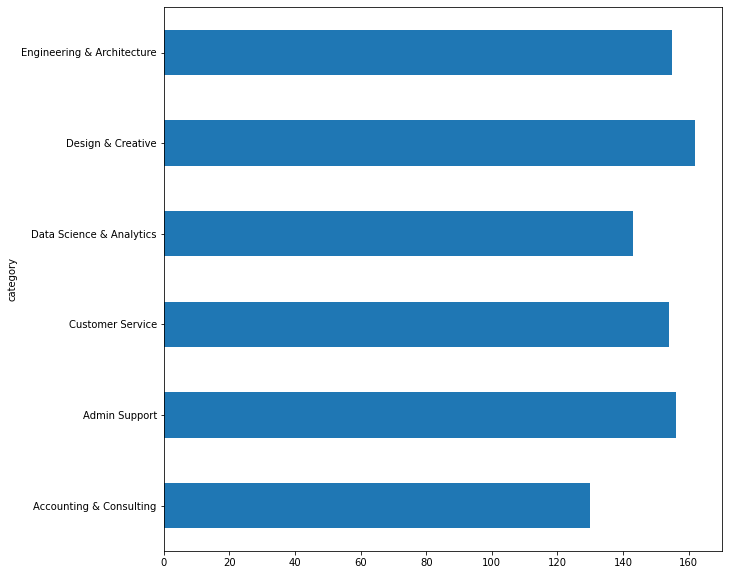

In [141]:
categories = df.groupby("category")["category"].count()
categories.plot(kind="barh", fontsize = 10, figsize =(10,10))

 * The dataset is balanced

#### freelancers per Country : 

<AxesSubplot:ylabel='country'>

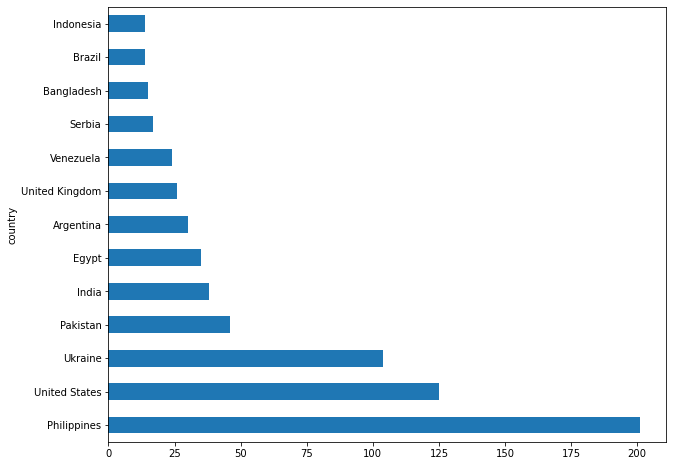

In [142]:
#### Number of freelancers per country :
countries = df.groupby(df["country"])["country"].count()
countries_most = countries[countries > 10].sort_values(ascending=False)
countries_most.plot(kind="barh", figsize= (10, 8))


what fields freelancers of these 3 leading countries work in the most 

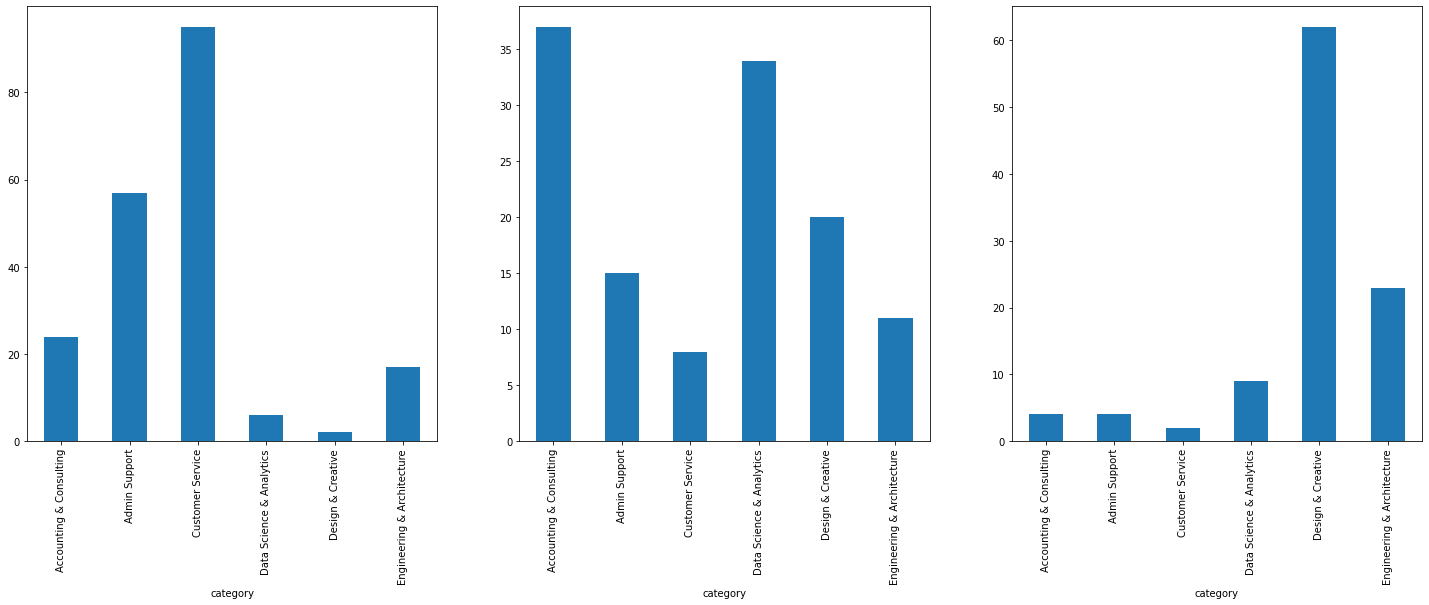

In [143]:
lead_country = ["Philippines", "United States", "Ukraine"]
fig = plt.figure(figsize=(25,8))
for i,country in enumerate(lead_country) : 
    fig.add_subplot(1,3,i+1)
    serie = df[df['country']==country].groupby("category")["category"].count()
    serie.plot(kind='bar')


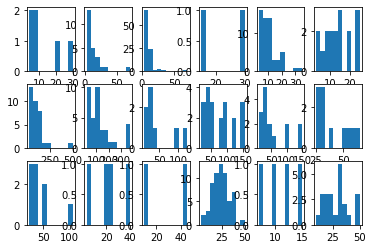

In [172]:
countries_ = df.groupby(df["country"])["country"].count()
countries_most_ = countries_[countries_ > 100].sort_values(ascending=False)
countries_list = list(countries_most_.index)
categories_list = df["category"].unique()

number_countries = len(countries_list)
number_categories = len(categories_list)
dist_fig, ax= plt.subplots(number_countries, number_categories,sharex=True, sharey=True)
for i in range(number_countries):
    for j in range(number_categories):
        df_country = df.loc[(df["country"] ==countries_list[i]) & (df["category"] == categories_list[j])]
        ax[i,j].hist(df_country["hourly_price"])
        #sns.displot(df_country["hourly_price"])

<Figure size 576x576 with 0 Axes>

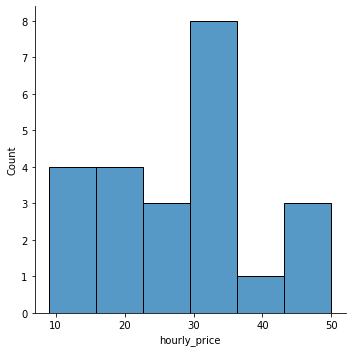

In [145]:
countries_list = df.loc[]

<Figure size 576x576 with 0 Axes>

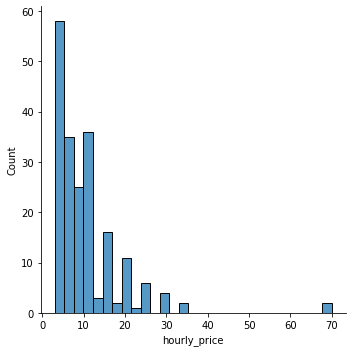

In [146]:
df_philip =df[df["country"]=="Philippines"]
plt.figure(figsize=(8,8))
sns.displot(df_philip["hourly_price"])

D:\programmes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hourly_price', ylabel='Density'>

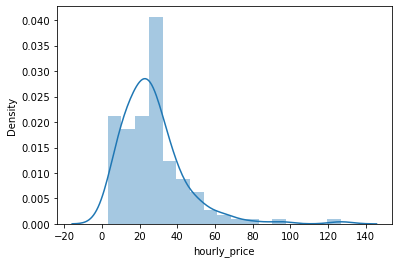

In [147]:
outl =df.loc[(df["category"]=="Engineering & Architecture")] 
sns.distplot(outl["hourly_price"])

D:\programmes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hourly_price', ylabel='Density'>

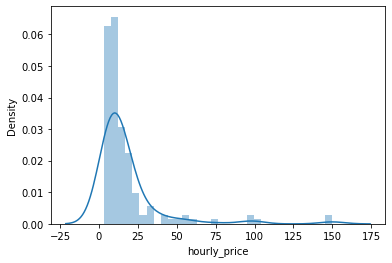

In [148]:
outl =df.loc[(df["category"]=="Admin Support")] 
sns.distplot(outl["hourly_price"])